# Mixup

The [mixup paper](https://arxiv.org/abs/1710.09412) is for deep learning. Would it work with general linear models?

In [1]:
library(ggplot2)

Can we relearn the relationship

In [2]:
df <- data.frame(
    x = seq(1, 100)
)

df$y1 = df$x * 5
df$y2 = df$x / 8 + 8

# df$y1 <- scale(df$y1)
# df$y2 <- scale(df$y2)

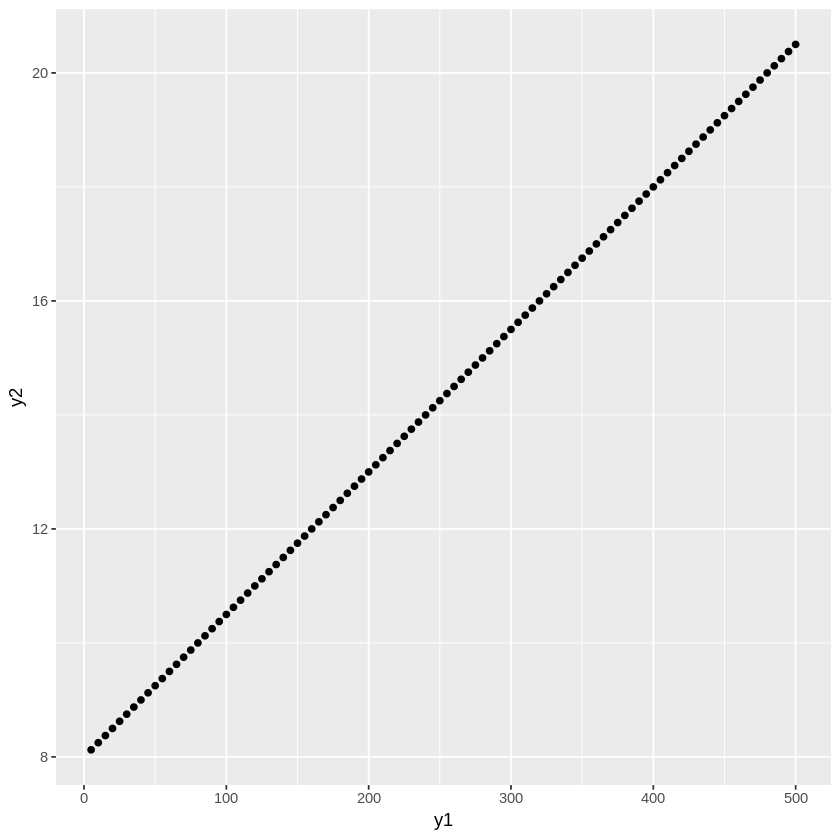

In [3]:
ggplot(df) + geom_point(aes(y1, y2))

In [4]:
x.prop <- runif(length(df$y1) * length(df$y2))

In [5]:
head(x.prop)

[1] 0.6191840 0.2495162 0.9877469 0.2683790 0.6272731 0.8457574

## Exhaustive combination

In [6]:
z <- outer(df$y1, df$y2, FUN = "+")

In [7]:
length(c(z))

[1] 10000

In [8]:
bigdf <- data.frame(
    x1 = rep(1:100, times=length(df$y2)),
    x2 = rep(1:100, each=length(df$y1)),
    y1 = rep(df$y1, times = length(df$y2)),
    y2 = rep(df$y2, each = length(df$y1)),
    combo = c(z),
    portion = x.prop
)

bigdf$portion = bigdf$portion + 0.5 - mean(bigdf$portion)

bigdf$othercombo <- 2 * (bigdf$portion * bigdf$y1 + (1-bigdf$portion) * bigdf$y2)

In [9]:
head(bigdf)
tail(bigdf)

x1,x2,y1,y2,combo,portion,othercombo
1,1,5,8.125,13.125,0.6150342,12.40604
2,1,10,8.125,18.125,0.2453664,17.17012
3,1,15,8.125,23.125,0.9835971,29.77446
4,1,20,8.125,28.125,0.2642291,22.52544
5,1,25,8.125,33.125,0.6231233,37.28041
6,1,30,8.125,38.125,0.8416076,53.07033


,x1,x2,y1,y2,combo,portion,othercombo
9995,95,100,475,20.5,495.5,0.58762202,575.14841
9996,96,100,480,20.5,500.5,0.05734547,93.70049
9997,97,100,485,20.5,505.5,0.53502957,538.04247
9998,98,100,490,20.5,510.5,0.16788584,198.64480
9999,99,100,495,20.5,515.5,0.28839087,314.68293
10000,100,100,500,20.5,520.5,0.12049526,156.55496


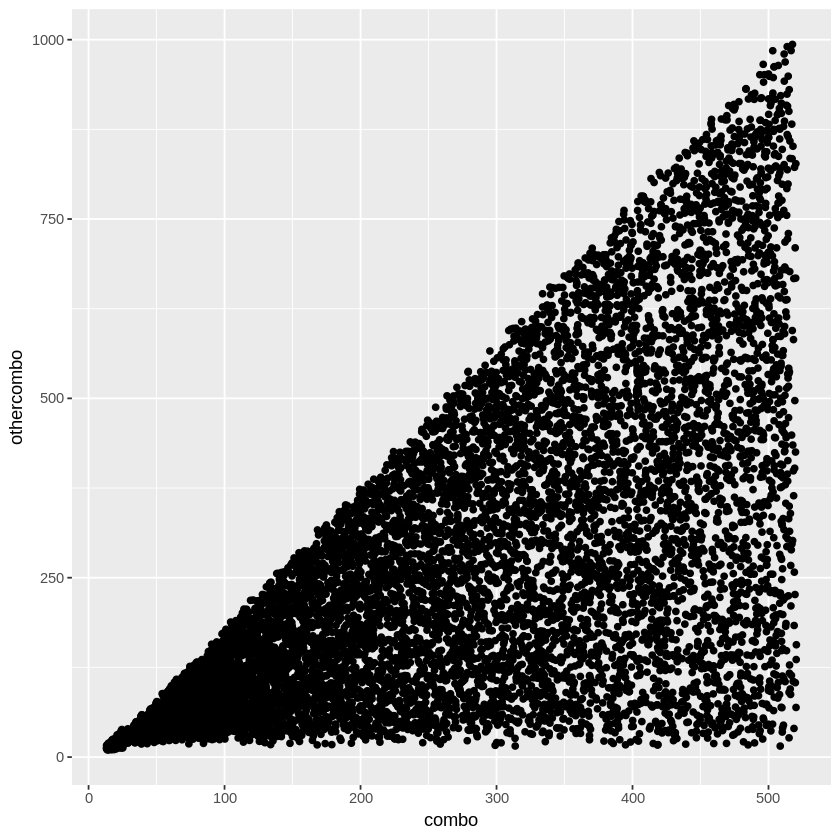

In [10]:
ggplot(subset(bigdf)) + geom_point(aes(combo, othercombo))

In [11]:
head(bigdf)
tail(bigdf)

x1,x2,y1,y2,combo,portion,othercombo
1,1,5,8.125,13.125,0.6150342,12.40604
2,1,10,8.125,18.125,0.2453664,17.17012
3,1,15,8.125,23.125,0.9835971,29.77446
4,1,20,8.125,28.125,0.2642291,22.52544
5,1,25,8.125,33.125,0.6231233,37.28041
6,1,30,8.125,38.125,0.8416076,53.07033


,x1,x2,y1,y2,combo,portion,othercombo
9995,95,100,475,20.5,495.5,0.58762202,575.14841
9996,96,100,480,20.5,500.5,0.05734547,93.70049
9997,97,100,485,20.5,505.5,0.53502957,538.04247
9998,98,100,490,20.5,510.5,0.16788584,198.64480
9999,99,100,495,20.5,515.5,0.28839087,314.68293
10000,100,100,500,20.5,520.5,0.12049526,156.55496


## Can we jointly learn the two models using their linear combination?

In [12]:
summary(gmod <- glm(combo ~ x1 + x2, data=bigdf))


Call:
glm(formula = combo ~ x1 + x2, data = bigdf)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.842e-12  -1.762e-12  -5.684e-13   5.755e-13   1.737e-12  

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 8.000e+00  3.908e-14 2.047e+14   <2e-16 ***
x1          5.000e+00  5.073e-16 9.855e+15   <2e-16 ***
x2          1.250e-01  5.073e-16 2.464e+14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2.144727e-24)

    Null deviance: 2.0844e+08  on 9999  degrees of freedom
Residual deviance: 2.1441e-20  on 9997  degrees of freedom
AIC: -516607

Number of Fisher Scoring iterations: 1


#### Can we do it with just a sample of 50, instead of all 10,000?

If you have to do this exhaustively to get the right answer, then it's not actually interesting. This test shows that with just ~50 mixed-up samples you can get the same parameter estimates as if you used all 10,000.

In [13]:
summary(gmod <- glm(combo ~ x1 + x2, data=dplyr::sample_n(bigdf, 50, replace = FALSE)))


Call:
glm(formula = combo ~ x1 + x2, data = dplyr::sample_n(bigdf, 
    50, replace = FALSE))

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
0.000e+00  0.000e+00  4.263e-14  5.684e-14  5.684e-14  

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 8.000e+00  1.676e-14 4.774e+14   <2e-16 ***
x1          5.000e+00  2.115e-16 2.364e+16   <2e-16 ***
x2          1.250e-01  2.054e-16 6.086e+14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.783161e-27)

    Null deviance: 1.0268e+06  on 49  degrees of freedom
Residual deviance: 8.3809e-26  on 47  degrees of freedom
AIC: -2932.8

Number of Fisher Scoring iterations: 1


### Error (of ?seemingly arbitrary size?) if proportion is not exactly 0.5

In [14]:
summary(gmod <- glm(othercombo ~ x1 + x2, data=bigdf))


Call:
glm(formula = othercombo ~ x1 + x2, data = bigdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-492.17   -87.94     0.00    87.39   482.47  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.14486    4.29172   2.364   0.0181 *  
x1           4.96857    0.05571  89.180   <2e-16 ***
x2           0.09134    0.05571   1.640   0.1011    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 25864.73)

    Null deviance: 464341167  on 9999  degrees of freedom
Residual deviance: 258569709  on 9997  degrees of freedom
AIC: 129990

Number of Fisher Scoring iterations: 2


### This is the same result as we would learn for the individual models

In [15]:
summary(glm(y1 ~ x1, data=bigdf))


Call:
glm(formula = y1 ~ x1, data = bigdf)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.274e-12  -1.151e-12  -4.263e-14   1.091e-12   2.211e-12  

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -2.256e-12  2.620e-14 -8.609e+01   <2e-16 ***
x1           5.000e+00  4.504e-16  1.110e+16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.690369e-24)

    Null deviance: 2.0831e+08  on 9999  degrees of freedom
Residual deviance: 1.6900e-20  on 9998  degrees of freedom
AIC: -518988

Number of Fisher Scoring iterations: 1


In [16]:
summary(glm(y2 ~ x2, data=bigdf))


Call:
glm(formula = y2 ~ x2, data = bigdf)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.208e-13  -1.004e-13  -8.171e-14  -6.040e-14  -3.908e-14  

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 8.000e+00  1.705e-15 4.691e+15   <2e-16 ***
x2          1.250e-01  2.932e-17 4.263e+15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 7.162933e-27)

    Null deviance: 1.3020e+05  on 9999  degrees of freedom
Residual deviance: 7.1615e-23  on 9998  degrees of freedom
AIC: -573626

Number of Fisher Scoring iterations: 1
